In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split  
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("glaucoma_preprocessed.csv")

In [4]:
X , Y = data.values [ : , : -1 ] , data.values [ : , -1 ] 

In [5]:
print ( "classes are : " , np.unique ( Y ) )  

classes are :  [0. 1.]


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y , test_size = 0.3 , random_state = 7)

In [7]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_train, Y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [8]:
Y_pred= classifier.predict(X_test)  

In [18]:
cm= confusion_matrix(Y_test, Y_pred)  
cm

array([[  5,  39],
       [ 20, 127]], dtype=int64)

In [10]:
print(cm)

[[  5  39]
 [ 20 127]]


In [11]:


print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))


Accuracy: 0.6910994764397905
Precision: 0.7650602409638554
Recall: 0.8639455782312925
F1 Score: 0.8115015974440895


In [12]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Sensitivity, hit rate, recall, or true positive rate
sensitivity = TP / (TP + FN)
print(f'Sensitivity: {sensitivity}')

# Specificity or true negative rate
specificity = TN / (TN + FP)
print(f'Specificity: {specificity}')

Sensitivity: 0.8639455782312925
Specificity: 0.11363636363636363


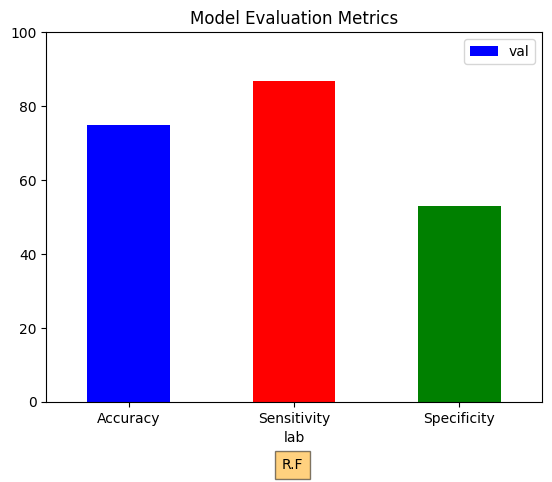

In [15]:

# Create DataFrame
df = pd.DataFrame({
    'lab': ['Accuracy', 'Sensitivity', 'Specificity'],
    'val': [75, 86.9, 53.1]
})

# Create bar chart
ax = df.plot.bar(x='lab', y='val', rot=0, color=['b', 'r', 'g'])
plt.ylim([0.0, 100.0])
plt.figtext(0.51, -0.03, "R.F", ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.title('Model Evaluation Metrics')
plt.show()


In [17]:
from sklearn.metrics import classification_report
import pandas as pd
report_rf = classification_report(Y_test, Y_pred, output_dict=True)
df_rf = pd.DataFrame(report_rf).transpose()
df_rf

,precision,recall,f1-score,support
0.0,0.200000,0.113636,0.144928,44.000000
1.0,0.765060,0.863946,0.811502,147.000000
accuracy,0.691099,0.691099,0.691099,0.691099
macro avg,0.482530,0.488791,0.478215,191.000000
weighted avg,0.634889,0.691099,0.657945,191.000000
